In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sn

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

In [3]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
df = pd.read_excel("D:\TCS INTERNSHIP\sampledatasets\Superstore.xls")
technology = df.loc[df['Category'] == 'Technology']

# 4 years of technology sales data

In [5]:
technology['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
technology['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

# data preprocessing.

includes removal of unwanted coloumns and null values...aggregtae sales by date and so on... 

In [7]:
#cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
#technology=technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')

In [8]:
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7478,7479,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,4,0.0,204.1092
7477,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742
593,594,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,...,78041,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.200,3,0.2,9.7500
765,766,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,646.740,6,0.0,258.6960
1913,1914,CA-2014-103366,2014-01-15,2014-01-17,First Class,EH-13990,Erica Hackney,Consumer,United States,Roswell,...,30076,South,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,149.950,5,0.0,65.9780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,4925,CA-2017-114055,2017-12-25,2017-12-29,Second Class,MH-18115,Mick Hernandez,Home Office,United States,Huntsville,...,35810,South,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,90.480,2,0.0,23.5248
2569,2570,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,...,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
573,574,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,10024,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,3,0.0,4.0095
1878,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3,0.2,22.6782


In [9]:
technology.isnull().sum()  #shows no null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

In [11]:
technology[technology["Sales"]==technology["Sales"].max()]

,Order Date,Sales
21,2014-03-18,24739.748


In [12]:
technology[technology["Sales"]==technology["Sales"].min()]

,Order Date,Sales
719,2017-08-13,1.584


In [13]:
technology.head(20)

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20
5,2014-01-20,699.93
6,2014-01-26,343.33
7,2014-02-01,468.90
8,2014-02-02,180.96
9,2014-02-06,306.56


# Indexing with time series analysis

In [16]:
technology = technology.set_index('Order Date')
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [17]:
y = technology['Sales'].resample('MS').mean()

# lets glance at 2017 data...

In [18]:
y['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

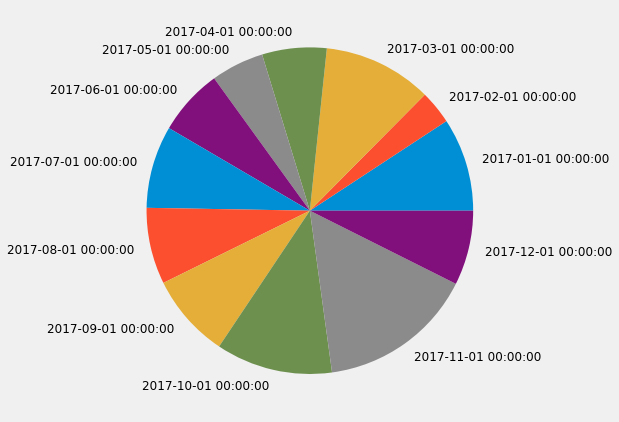

In [19]:
fig = plt.figure(figsize =(10, 7))
plt.pie(y['2017':],labels=y['2017':].index)
# show plot
plt.show()

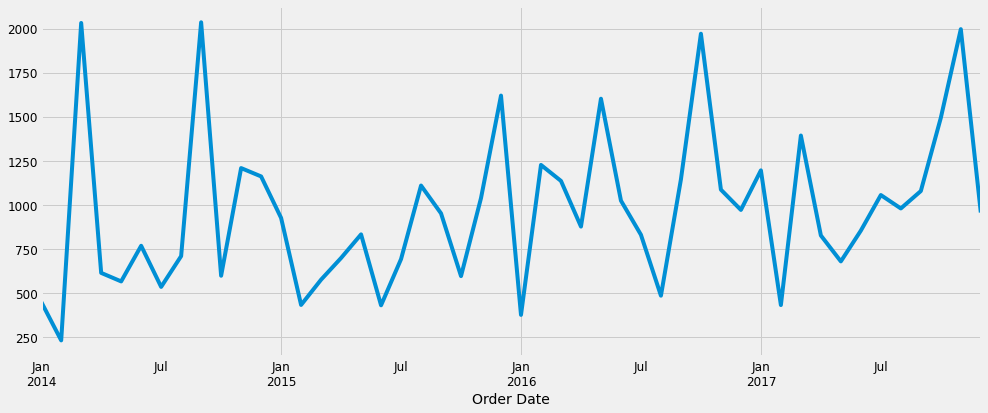

In [20]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are increasing at the beginning of the year or at a bare low level,observes a downfard trend at the end of the year. There is not always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

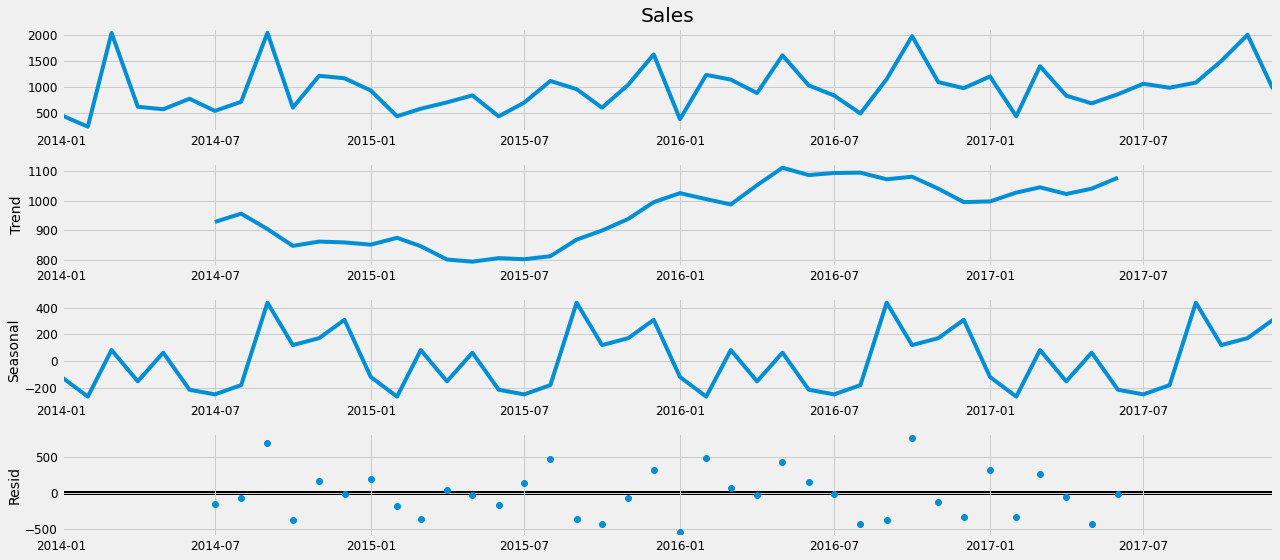

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of technology is unstable, along with its obvious seasonality.

In [22]:
#import seaborn as sns
#plt.figure(figsize=(18,10))
#sns.heatmap(technology.corr(),annot=True)
#plt.show()
technology.corr()
technology

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


# Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [23]:
import itertools

In [27]:
print(pdq)
print(p,d,q)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
range(0, 2) range(0, 2) range(0, 2)
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009955


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1551.45914025717
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882129
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:356.4725519398603
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1581.86930601748
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.8845253698532
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750875


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2754.3903167242024
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.048945474747
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:341.18923596698716
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.0827904028392


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2598.728175401325
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.8760065868655
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:342.63073634197235
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530285049


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1166.072008222969
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585881609627
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:355.16661591457915
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1421.366656153321
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.035448143496
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:357.1453829756189
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.9599897483566


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2601.994828346599
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811381
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:325.13949656466036
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.554232243411


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2603.276068979354
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.5230842754338
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:326.87694299703554
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345342


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1488.5825157698027
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:358.32500100246386
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758222


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1715.4717170099605
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.3768706589693
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:359.6676257512724
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622564


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2756.166967720588
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.8995751104083
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:341.73604345740176
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.7942232890128


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1422.6239403341895
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.31492579749636
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:343.43901681120735
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156986


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1475.5069885967207
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800667
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:352.88784627203603
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.5042506796667


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1751.476330738858
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.1259547275278
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:354.85006215883897
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925348994


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2278.9221245232075
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.790371045434
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:326.7008713657302
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923954


D:\chrome downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2638.1159908644677
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.6037335973491
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:328.3483915561842


In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2357      0.229     -1.028      0.304      -0.685       0.214
ma.L1         -1.0000      0.275     -3.638      0.000      -1.539      -0.461
ar.S.L12      -0.6165      0.141     -4.358      0.000      -0.894      -0.339
sigma2      2.332e+05   1.18e-06   1.98e+11      0.000    2.33e+05    2.33e+05


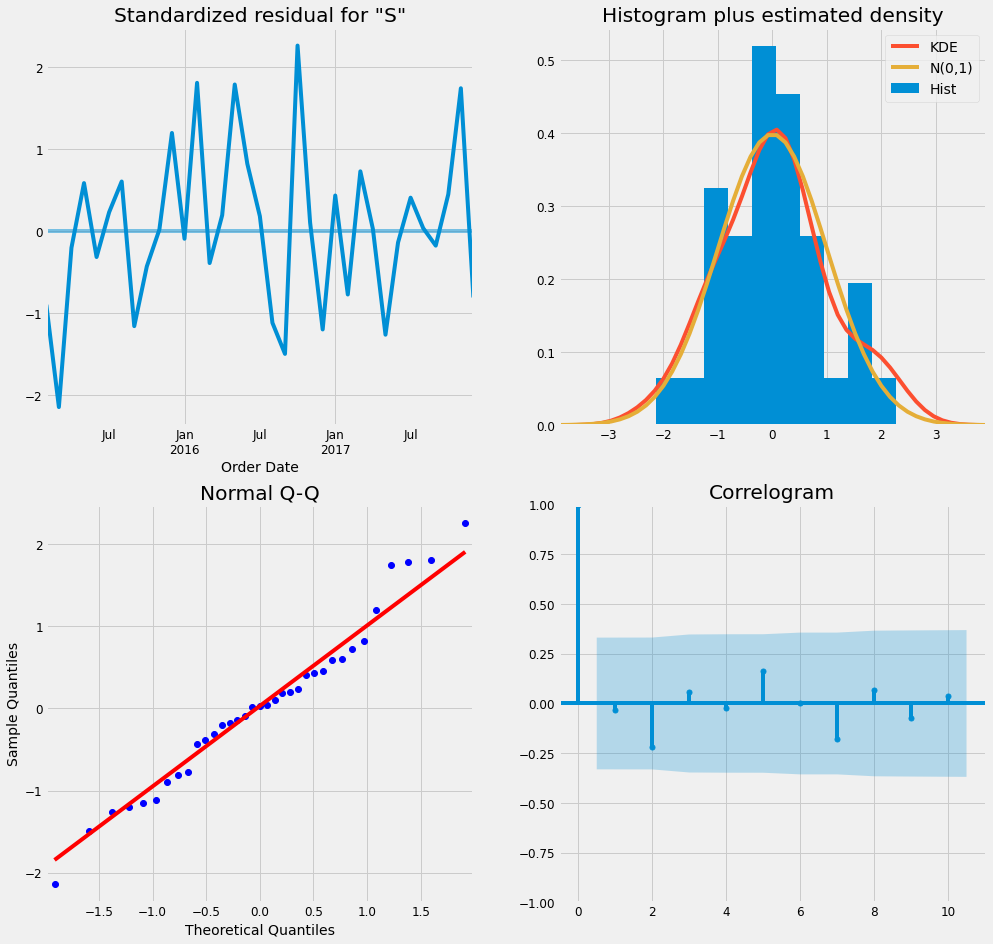

In [30]:
results.plot_diagnostics(figsize=(15,15))
plt.show()

# Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

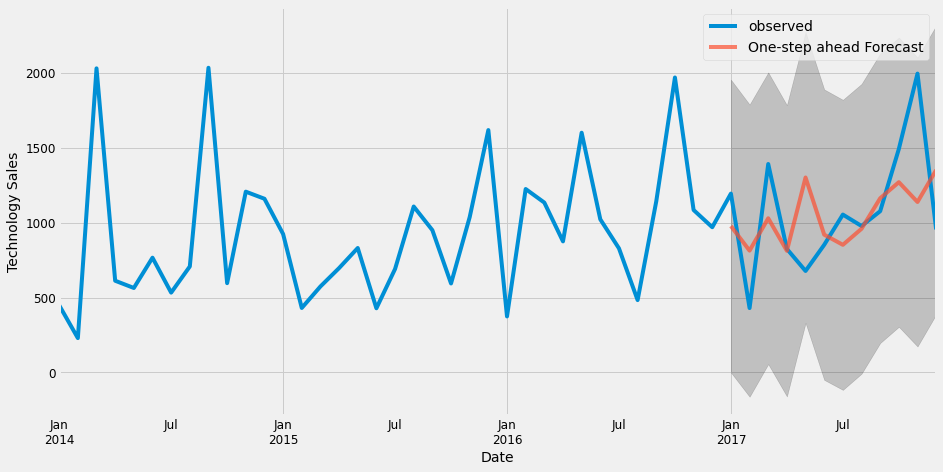

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()

plt.show()


The line plot is showing the observed values compared to the rolling forecast predictions. 
Overall, it is showing an upward trend though not significant, starts from the beginning of the year.

In [32]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 142623.97


In [33]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 377.66


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily technology sales in the test set within 371.66 of the real sales. In my opinion, this is a pretty good model so far.

# Producing and visualizing forecasts

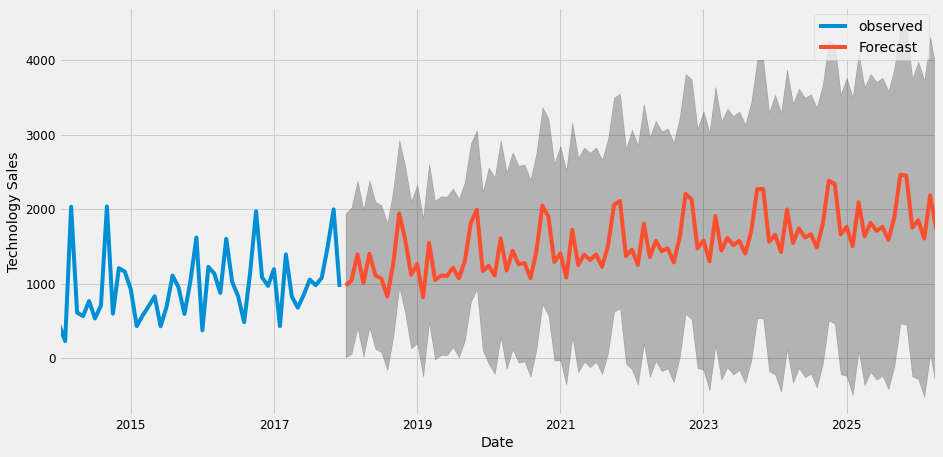

In [34]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')

plt.legend()
plt.show()


Our model clearly captured technology sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other onver time. Therefore, we are going to compare time series of technology and office supplier.

# Time Series comparison technology and Office Supplies

# Data Preprocessing

In [35]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']

In [36]:
technology.shape, office.shape

((1847, 21), (6026, 21))

In [37]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')

technology= technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

Lets look at the data now!!!

In [38]:
technology.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [39]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


# Data exploration

We are going to compare two categories' sales in the same time period. This means combine two data frames into one and plot these two categories' time series into one plot.

In [40]:
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')

y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales':y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = technology.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


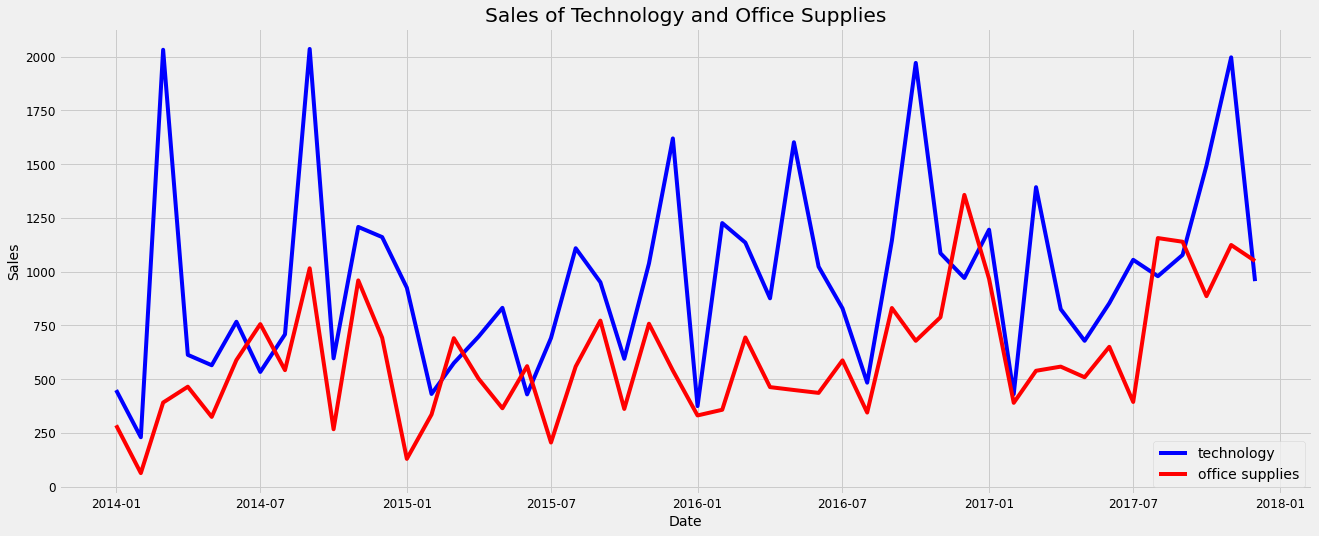

In [41]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Technology and Office Supplies')
plt.legend();

We observe that sales of technology and office supplies shared a similar seasonal pattern. 
It seems summer time is quiet for office supplies too. in addition, average daily sales for technology are higher than those of office supplies in most of the months. It is understandable, as the value of technology should be much higher than those of office supplies. 
Occassionaly, office supplies passed furnitue on average daily sales. 

# Time Series Modeling with Prophet

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [42]:
from prophet import Prophet

In [43]:
technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95)
technology_model.fit(technology)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


<Figure size 1296x432 with 0 Axes>

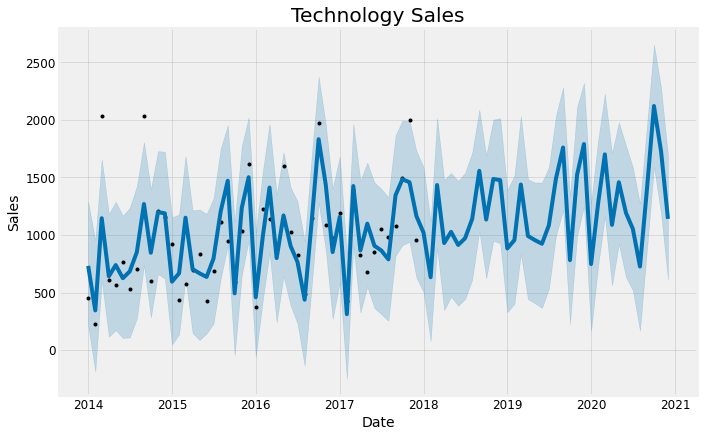

In [44]:
technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales');

<Figure size 1296x432 with 0 Axes>

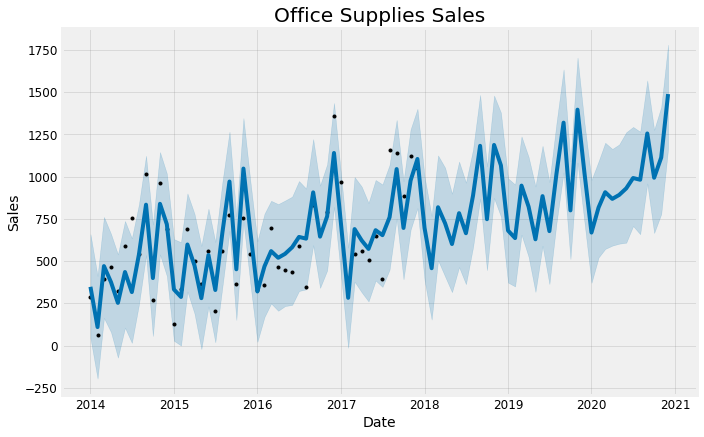

In [45]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

# Compare Forecasts

We already have the forecasts for three years for these two categories into the future.
Lets us compare the forecasts together now:


In [46]:
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_technology_forecast = technology_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_technology_forecast.columns = technology_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_technology_forecast, merge_office_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,technology_trend,technology_yhat_lower,technology_yhat_upper,technology_trend_lower,technology_trend_upper,technology_additive_terms,technology_additive_terms_lower,technology_additive_terms_upper,technology_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,952.354900,206.932213,1286.550454,952.354900,952.354900,-220.563518,-220.563518,-220.563518,-220.563518,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,958.476047,-186.930814,953.981700,958.476047,958.476047,-613.862382,-613.862382,-613.862382,-613.862382,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,964.004826,604.261265,1657.962820,964.004826,964.004826,181.796373,181.796373,181.796373,181.796373,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,970.125973,116.186195,1182.896746,970.125973,970.125973,-328.518998,-328.518998,-328.518998,-328.518998,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,976.049665,173.330078,1288.773612,976.049665,976.049665,-237.337621,-237.337621,-237.337621,-237.337621,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


# Visualizing the trend and the forecast

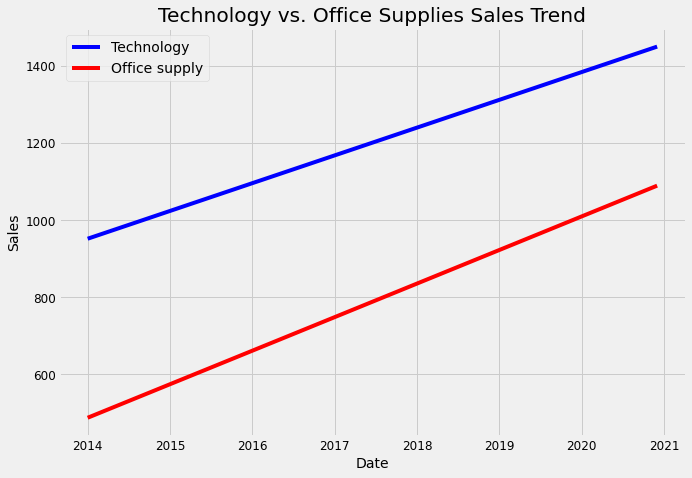

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_trend'], 'b-',label='Technology')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-',label='Office supply')
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Technology vs. Office Supplies Sales Trend');
plt.legend();

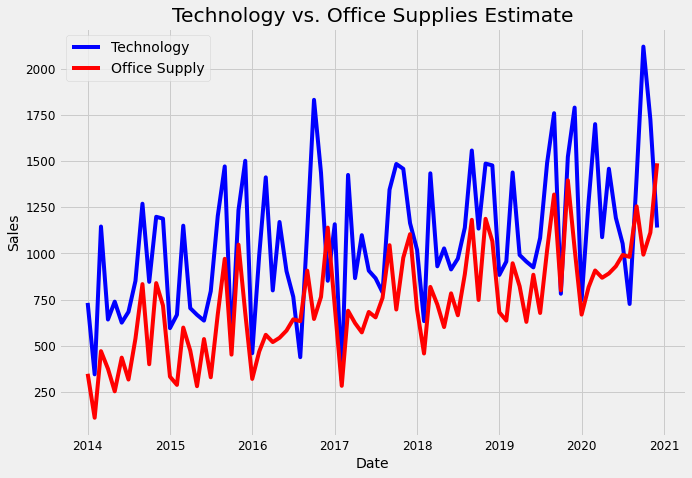

In [48]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_yhat'], 'b-',label='Technology')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-',label='Office Supply')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Technology vs. Office Supplies Estimate');

# Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

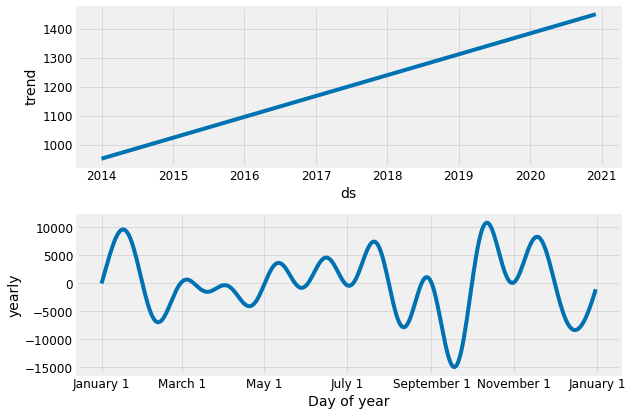

In [49]:
technology_model.plot_components(technology_forecast);

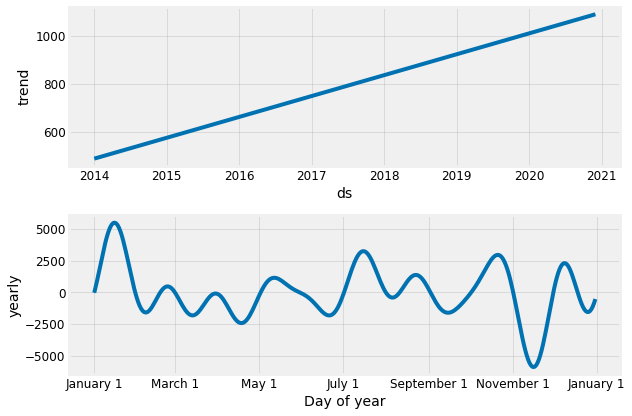

In [50]:
office_model.plot_components(office_forecast);

# Conclusion

Good to see that the sales for both technology and office supplies have been linearly increasing over time although office supplies' growth seems slightly stronger.

The worst month for technology is September, the worst month for office supplies is November. The best month for technology is October, and the best month for office supplies is January.


# Dumping files for streamlit app

In [51]:
import pickle

In [52]:
technology.head()

,ds,y
0,2014-01-01,449.041429
1,2014-02-01,229.787143
2,2014-03-01,2031.948375
3,2014-04-01,613.028933
4,2014-05-01,564.698588


In [53]:
office.head()

,ds,y
0,2014-01-01,285.357647
1,2014-02-01,63.042588
2,2014-03-01,391.176318
3,2014-04-01,464.794750
4,2014-05-01,324.346545


In [54]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [55]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [56]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [58]:
furniture= furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

In [59]:
furniture.head()

,ds,y
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [60]:
pickle.dump(furniture,open('furniture_df.pkl','wb'))
pickle.dump(office,open('office_df.pkl','wb'))
pickle.dump(technology,open('tech_df.pkl','wb'))
